# Övning: läsa GA App+Web data från BigQuery

I den här övningen kommer vi att träna på att hämta ut Google Analytics App+Web data från BigQuery och presentera denna i en Jupyter notebook. Innan vi börjar med en specifik uppgift ser vi till att vi kopplat upp oss mot vårt BigQuery-konto:


In [38]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


##Uppgift 1: Visa antal unika besökare på webbsajten per dag

I den här uppgiften skall vi ta fram antalet unika besökare på vår SquadFree webbsajt (https://hornstein.github.io) som vi tidigare taggat upp i Tag manager och kopplat ihop med BigQuery via integrationen i Firebase. 

Firebase skapar en tabell per dag. För att söka i alla tabeller för t.ex. november kan vi använda oss av en wildcard (*) när vi anger tabellnamnet.

Eftersom vi har både en mobilapp (Bluebottles väderapp SurfsApp) och en webbsajt (SquadFree) så använder vi en where-sats för att enbart ta med rader som kommer från webbsajten.

In [0]:
%%bigquery --project surfsapp-8011b df

SELECT event_date, count(distinct user_pseudo_id) AS users 
FROM `surfsapp-8011b.analytics_164498740.events_201911*`
WHERE platform='WEB'
GROUP BY event_date
ORDER BY event_date


In [40]:
df

,event_date,users
0,20191113,2
1,20191114,2
2,20191115,1
3,20191116,1
4,20191117,1
5,20191118,2
6,20191119,2
7,20191120,2


Vi kan skapa en enkel plot med matplotlib:

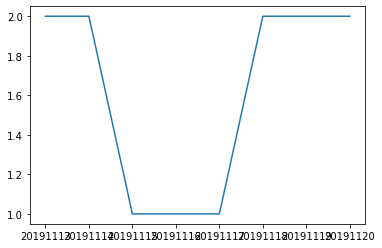

In [41]:
import matplotlib.pyplot as plt

plt.plot(df['event_date'], df['users']);

För att skapa snyggare grafer kan vi använda oss av seaborn biblioteket:

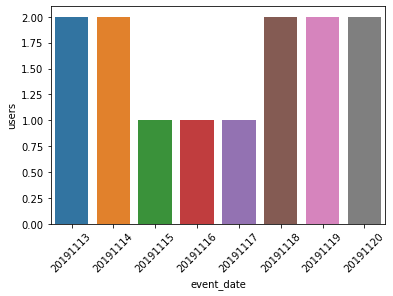

In [42]:
import seaborn as sns
chart=sns.barplot(x = 'event_date', y = 'users', data = df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

## Uppgift 2: Visa antal klick per menyalternativ på webbsajten per dag

När någon klickar på en meny på sajten så fångar vi det via Tag Manager och skickar ett event med namnet *menu_click* och en parameter *click_url* som innehåller värdet på klick-url:en. Vi kan använda denna för att hitta antalet klick på respektive menyalternativ.

Eftersom det kan finnas flera parametrar för varje event så är *event_param* av typen *RECORD*, mode *REPEATED*, och vi behöver därför använda oss av UNNEST för att att komma åt dessa:

In [0]:
%%bigquery --project surfsapp-8011b df2

SELECT 
  event_date, 
  ep.value.string_value AS url, 
  count(*) AS clicks 
FROM `surfsapp-8011b.analytics_164498740.events_201911*`, UNNEST(event_params) as ep
WHERE platform='WEB' and ep.key='click_url'
GROUP BY event_date, ep.value.string_value 
ORDER BY event_date


In [48]:
df2

,event_date,url,clicks
0,20191113,https://hornstein.github.io/#about,11
1,20191113,https://hornstein.github.io/#service,9
2,20191113,https://hornstein.github.io/#intro,5
3,20191113,https://hornstein.github.io/#contact,7
4,20191113,https://hornstein.github.io/index.html,1
5,20191113,https://hornstein.github.io/index.html#about,1
6,20191113,https://hornstein.github.io/index.html#service,1
7,20191114,https://hornstein.github.io/#intro,5
8,20191114,https://hornstein.github.io/#about,5
9,20191114,https://hornstein.github.io/#service,5


Slutlligen kan vi visualisera detta med en barplot:

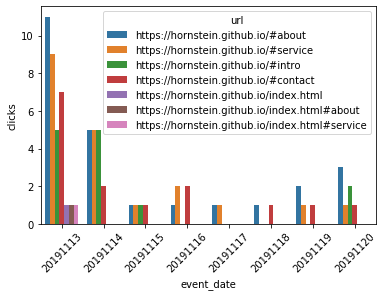

In [49]:
chart=sns.barplot(x = 'event_date', y = 'clicks', hue = 'url', data = df2)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);